<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Unit 3 Project: Supervised Learning

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline

In this project, you will practice the core skill of this course: supervised learning with passively collected, tabular, cross-sectional data. We will start with a regression problem, and then address a classification problem.

## Regression

In [3]:
# Load the dataset
noise = pd.read_csv(
    'data/airfoil_self_noise.dat',
    delimiter='\t',
    names=['frequency',
           'angle',
           'chord_length',
           'free_stream_velocity',
           'displacement_thickness',
           'self_noise',
          ]
)

- Read about this dataset [here](https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise). Write a short paragraph describing this dataset in your own words. How could a model for this dataset be useful?

It is about self-induced or better self-caused noise due to airflow over an airfoil. Scaled experiments in windtunnels are very hard to perform and theoretical calcultion is complicated. As a result, simulation is a more practical and quick solution.

- Find out how many rows and columns are in `noise`.

In [4]:
noise.head()

,frequency,angle,chord_length,free_stream_velocity,displacement_thickness,self_noise
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [5]:
noise.shape

(1503, 6)

- Find out what data types are present.

In [6]:
noise.dtypes

frequency                   int64
angle                     float64
chord_length              float64
free_stream_velocity      float64
displacement_thickness    float64
self_noise                float64
dtype: object

- Find out how many null values there are in each columns.

In [7]:
noise.info()
noise.isna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
frequency                 1503 non-null int64
angle                     1503 non-null float64
chord_length              1503 non-null float64
free_stream_velocity      1503 non-null float64
displacement_thickness    1503 non-null float64
self_noise                1503 non-null float64
dtypes: float64(5), int64(1)
memory usage: 70.5 KB


,frequency,angle,chord_length,free_stream_velocity,displacement_thickness,self_noise
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


- Check basic summary statistics for each column, including at least one measure of central tendency and one measure of dispersion.

In [8]:
noise.describe()

,frequency,angle,chord_length,free_stream_velocity,displacement_thickness,self_noise
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


- Plot of the distribution of each column, e.g. with some combination of histograms, bar plots, and box plots.

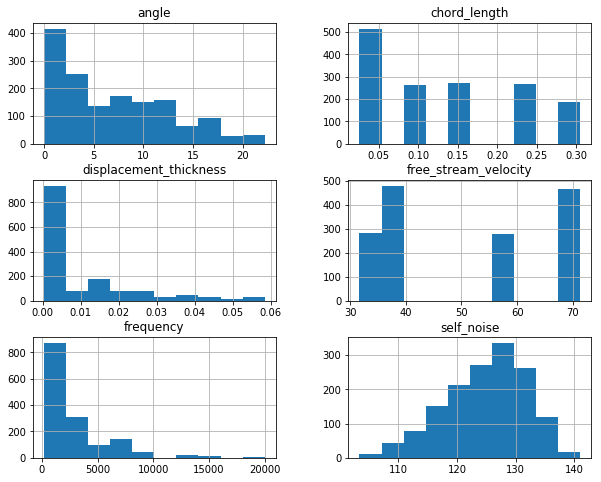

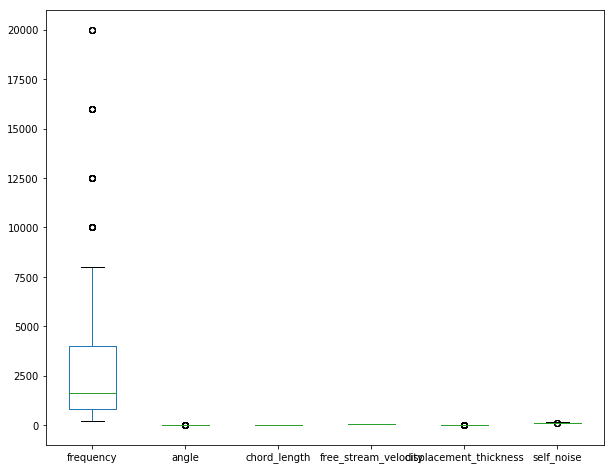

In [9]:
noise.hist(figsize=(10,8));
noise.plot(kind='box',figsize=(10,8))

- Which variables are approximately normally distributed?

self_noise

- Which variables show strong skew?

angle, displacement_thickness,frequency

- Make a scatterplot of each feature variable with the target variable "self_noise".

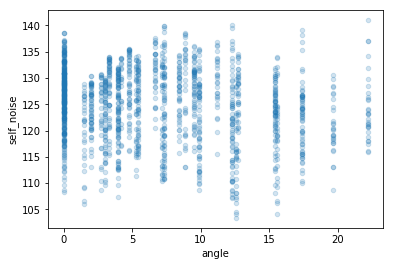

In [10]:
noise.plot(kind='scatter',x='angle',y='self_noise',alpha=0.2);

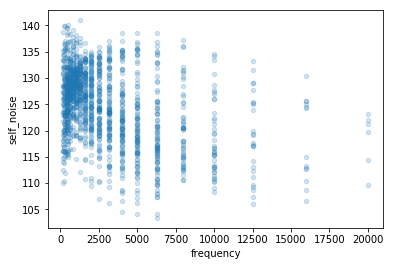

In [11]:
noise.plot(kind='scatter',x='frequency',y='self_noise',alpha=0.2);

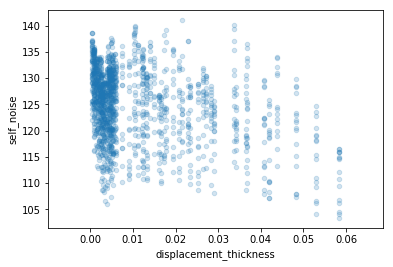

In [12]:
noise.plot(kind='scatter',x='displacement_thickness',y='self_noise',alpha=0.2);

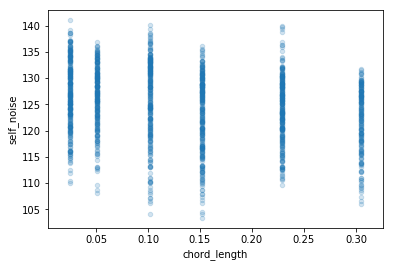

In [13]:
noise.plot(kind='scatter',x='chord_length',y='self_noise',alpha=0.2);

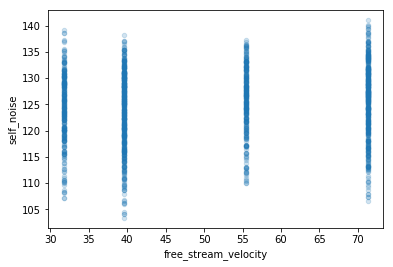

In [14]:
noise.plot(kind='scatter',x='free_stream_velocity',y='self_noise',alpha=0.2);

- Make a heatmap of the correlation matrix for this dataset. Be sure to use an appropriate colormap!

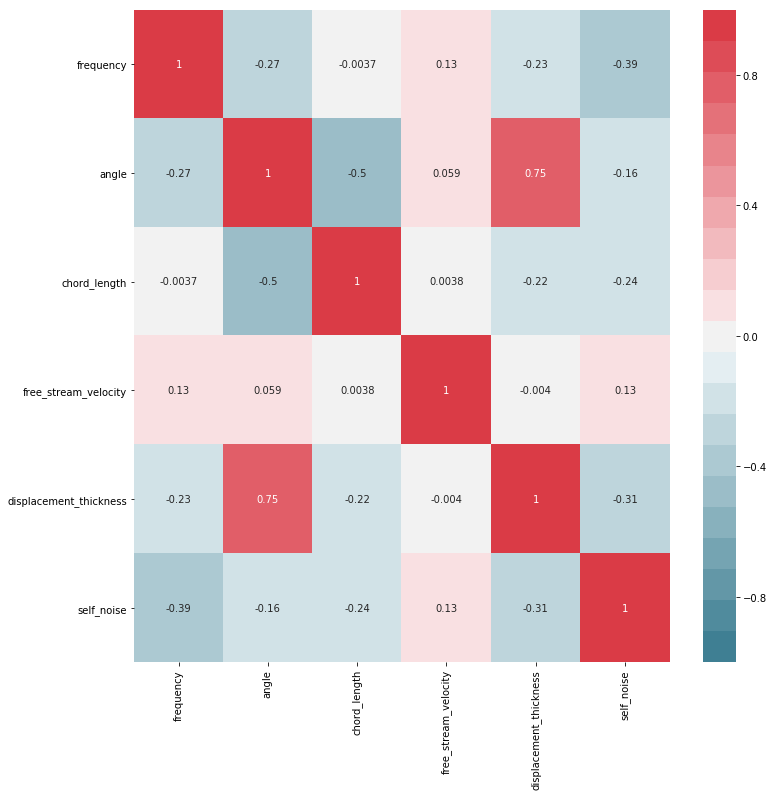

In [15]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(
    noise.corr(),
    vmin=-1,
    vmax=1,
    cmap=sns.diverging_palette(220, 10, n=21),
            annot=True,
            ax=ax,
);

- What do you notice about this dataset that will make a difference to how you model it? Feel free to do additional EDA at this point.

- Develop a linear regression model to predict the target variable "self_noise". Train it on 70% of the data. Gets its R^2 score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [16]:
from sklearn.model_selection import train_test_split
noise.columns
feature_cols=['frequency','angle','chord_length','free_stream_velocity','displacement_thickness']
target_cols='self_noise'
X=noise.loc[:,feature_cols]
y=noise.loc[:,target_cols]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.4938429380009733

In [17]:
lr.score(X_train,y_train)

0.5244059822508013

- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

since 0.48>0, my model learned something. However, it is still far from 1 which means my model has both bias and variance problems

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

test set (0.48) < train set (0.52), which means test set doen't perform as good as training set. bias high, variance low

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

more bias problem

- Develop a random forest model with 100 or more trees to predict the target variable. Train it on 70% of the data. Gets its R^2 score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [30]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(X_train,y_train)
print(rfr.score(X_train,y_train))
print(rfr.score(X_test,y_test))

0.9894342596355894
0.9309266053343307


- Compare the bias, variance, and overall predictive performance of your random forest model to that of your linear regression model.

random forest model providesbetter overall predictive performance, however, bias is still high and variance is still low

- Find a way to get a better score from either linear regression or a random forest. Make notes about what you are trying and why.

I will use GridSearchCV with 5 fold cross-validation (RandomForestRegressor)

In [36]:
from sklearn.model_selection import GridSearchCV, KFold
kf = KFold(5,shuffle=True)

grid = GridSearchCV(
    estimator = rfr,
    param_grid={},
    cv = kf,
    return_train_score=True
)

grid.fit(X,y)
print(grid.cv_results_['mean_test_score'])
print(grid.cv_results_['mean_train_score'])

[0.9331625]
[0.99097914]


only slightly improvement

- **BONUS:** Keep going! Find ways to make your model better.

## Classification

- Read about this dataset [here](https://archive.ics.uci.edu/ml/datasets/Credit+Approval). Write a short paragraph describing this dataset in your own words. How could a model for this dataset be useful?

In [60]:
# Load the dataset
credit = pd.read_csv(
    'data/crx.data',
    names=range(1, 17)
)

- Find out how many rows and columns are in `credit`.

In [61]:
credit.shape

(690, 16)

- Find out what data types are present.

In [62]:
credit.dtypes

1      object
2      object
3     float64
4      object
5      object
6      object
7      object
8     float64
9      object
10     object
11      int64
12     object
13     object
14     object
15      int64
16     object
dtype: object

- Columns 2 and 14 are "object" but are listed as "continuous" in the dataset description. Tranform these columns to have the appropriate data type. You will need to deal with the special character "?"

In [63]:
credit.columns = ["para1","para2","para3","para4","para5","para6","para7","para8","para9","para10","para11","para12","para13","para14",
                 "para15","para16"]
credit.head()

,para1,para2,para3,para4,para5,para6,para7,para8,para9,para10,para11,para12,para13,para14,para15,para16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [73]:
credit = credit[credit.loc[:,:]!="?"]
credit.shape
# dropped 12 rows contains "?" in column "para2"

(678, 16)

In [74]:
credit[['para2', 'para14']] = credit[['para2', 'para14']].apply(pd.to_numeric) 

In [75]:
credit.dtypes

para1      object
para2     float64
para3     float64
para4      object
para5      object
para6      object
para7      object
para8     float64
para9      object
para10     object
para11      int64
para12     object
para13     object
para14    float64
para15      int64
para16     object
dtype: object

In [99]:
#pd.get_dummies(credit,columns=['para16'],drop_first=True)
#credit['para16'] = credit['para16'].apply(pd.to_numeric)
#credit.dtypes

credit.loc[credit.para16 == '+','para16'] = 1
credit.loc[credit.para16 == '-','para16'] = 0
credit.para16.value_counts(normalize=True)

0    0.550147
1    0.449853
Name: para16, dtype: float64

- Find out how many null values there are in each columns.

In [100]:
credit.info()
credit.isna()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 678 entries, 0 to 689
Data columns (total 16 columns):
para1     666 non-null object
para2     678 non-null float64
para3     678 non-null float64
para4     672 non-null object
para5     672 non-null object
para6     669 non-null object
para7     669 non-null object
para8     678 non-null float64
para9     678 non-null object
para10    678 non-null object
para11    678 non-null int64
para12    678 non-null object
para13    678 non-null object
para14    666 non-null float64
para15    678 non-null int64
para16    678 non-null int64
dtypes: float64(4), int64(3), object(9)
memory usage: 90.0+ KB


,para1,para2,para3,para4,para5,para6,para7,para8,para9,para10,para11,para12,para13,para14,para15,para16
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


- Check basic summary information for each column, including categorical columns.

In [101]:
credit.describe(include='all')

,para1,para2,para3,para4,para5,para6,para7,para8,para9,para10,para11,para12,para13,para14,para15,para16
count,666,678.000000,678.000000,672,672,669,669,678.000000,678,678,678.000000,678,678,666.000000,678.000000,678.000000
unique,2,NaN,NaN,3,3,14,9,NaN,2,2,NaN,2,3,NaN,NaN,NaN
top,b,NaN,NaN,u,g,c,v,NaN,t,f,NaN,f,g,NaN,NaN,NaN
freq,459,NaN,NaN,511,511,136,391,NaN,355,385,NaN,369,615,NaN,NaN,NaN
mean,NaN,31.568171,4.777625,NaN,NaN,NaN,NaN,2.209226,NaN,NaN,2.435103,NaN,NaN,182.115616,1021.240413,0.449853
std,NaN,11.957862,4.997240,NaN,NaN,NaN,NaN,3.350755,NaN,NaN,4.896966,NaN,NaN,171.477919,5251.971453,0.497846
min,NaN,13.750000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,22.602500,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.000000,NaN,NaN,75.250000,0.000000,0.000000
50%,NaN,28.460000,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,NaN,NaN,160.000000,5.000000,0.000000
75%,NaN,38.230000,7.437500,NaN,NaN,NaN,NaN,2.573750,NaN,NaN,3.000000,NaN,NaN,271.000000,395.500000,1.000000


- Plot of the distribution of each column, e.g. with some combination of histograms, bar plots, and box plots.

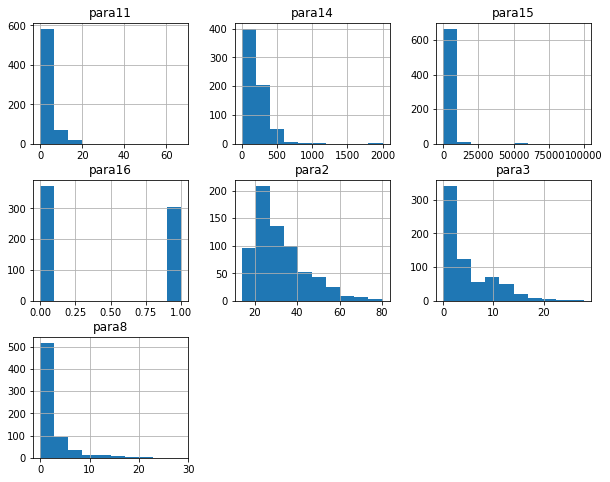

In [102]:
credit.hist(figsize=(10,8));

- Which variables are approximately normally distributed?

none

- Which variables show strong skew?

all of the numerical parameters are right skewed

- Make a scatterplot of each feature variable with the target variable (`16`).

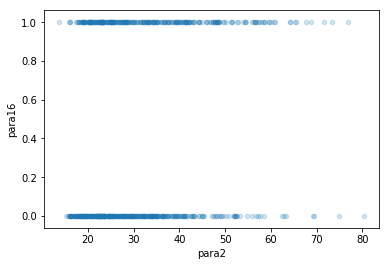

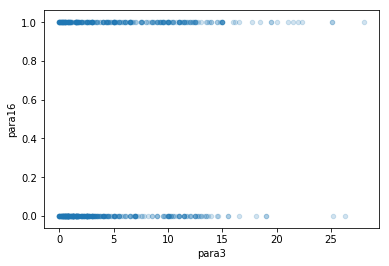

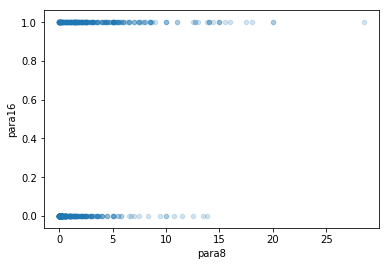

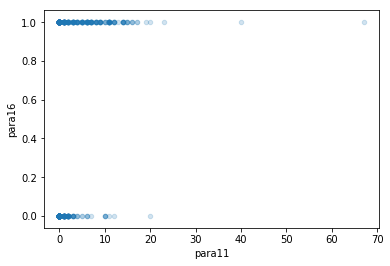

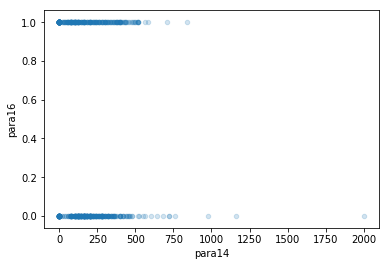

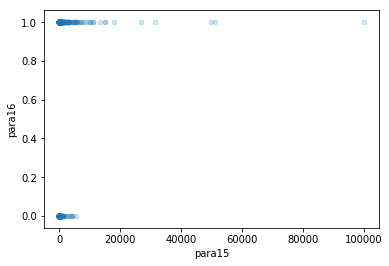

In [104]:
credit.plot(kind='scatter',x='para2',y='para16',alpha=0.2)
credit.plot(kind='scatter',x='para3',y='para16',alpha=0.2)
credit.plot(kind='scatter',x='para8',y='para16',alpha=0.2)
credit.plot(kind='scatter',x='para11',y='para16',alpha=0.2)
credit.plot(kind='scatter',x='para14',y='para16',alpha=0.2)
credit.plot(kind='scatter',x='para15',y='para16',alpha=0.2)

- Make a heatmap of the correlation matrix for numeric variables in this dataset. Be sure to use an appropriate colormap!

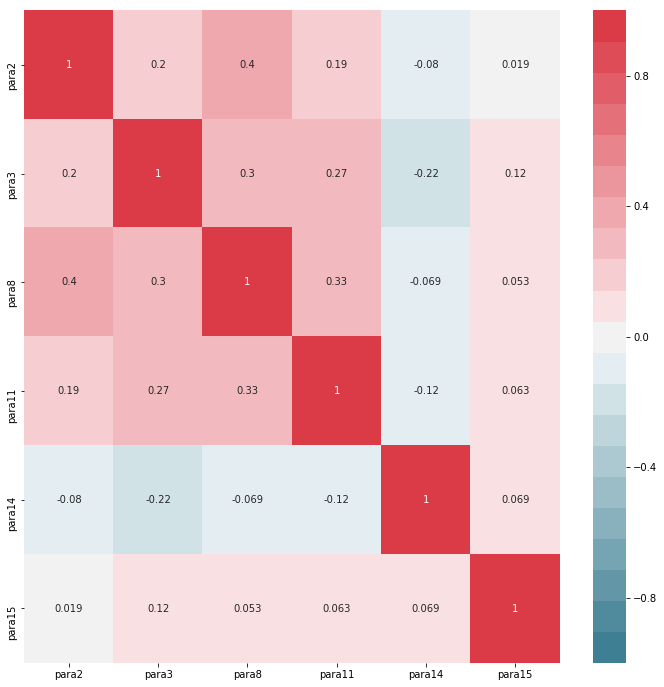

In [80]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(
    credit.corr(),
    vmin=-1,
    vmax=1,
    cmap=sns.diverging_palette(220, 10, n=21),
            annot=True,
            ax=ax,
);

- What do you notice about this dataset that will make a difference to how you model it? Feel free to do additional EDA at this point.

other non-numerical features may have stonger correlation

- What is the accuracy of a null model that just predicts the most common outcome each time on this dataset?

In [105]:
credit.para16.value_counts(normalize=True)

0    0.550147
1    0.449853
Name: para16, dtype: float64

55% increase credit score; 45% decreases credit score

- Develop a logistic regression model to predict the target variable `16`. Train it on 70% of the data. Gets its accuracy score on both that 70% and the other 30%. Use dummy-coding on categorical columns. Otherwise, at this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [117]:
from sklearn.linear_model import LogisticRegression
credit = credit.dropna(axis='rows')
credit.shape
feature_cols=['para2','para3','para8','para11','para14','para15']
target_cols='para16'
X = credit.loc[:,feature_cols]
y = credit.loc[:,target_cols]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

lr = LogisticRegression()
lr.fit(X_train,y_train)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))


0.7658643326039387
0.7704081632653061


C:\Users\huangxi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

performs better

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

test set performs not as good as train set. high bias

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

more bias

- Develop a random forest model with 100 or more trees to predict the target variable. Train it on 70% of the data. Gets its R^2 score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [118]:
from sklearn.ensemble import RandomForestClassifier

rfc =  RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
print(rfc.score(X_train,y_train))
print(rfc.score(X_test,y_test))

1.0
0.7704081632653061


- Compare the bias, variance, and overall predictive performance of your random forest model to that of your linear regression model.

better overall predictive performance; I think there is something worng since I got the training set score is 1...

- Find a way to get a better score from either linear regression or a random forest. Make notes about what you are trying and why.

In [119]:
from sklearn.model_selection import GridSearchCV, KFold
kf = KFold(5,shuffle=True)

grid = GridSearchCV(
    estimator = rfc,
    param_grid={},
    cv = kf,
    return_train_score=True
)

grid.fit(X,y)
print(grid.cv_results_['mean_test_score'])
print(grid.cv_results_['mean_train_score'])

[0.78101072]
[1.]


- **BONUS:** Keep going! Find ways to make your model better.